<a href="https://colab.research.google.com/github/Copita12/MLCopita/blob/master/TP4_Aprendizaje_de_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 4: Winsconsin Breast Cancer dataset.

Utilizare este dataset para entrenar varios modelos y probar su eficiencia

In [1]:
import pandas as pd
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
cancer_tissues

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Separamos los atributos utiles

In [2]:
att_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
att_se = ['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']
att_worst = ['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
att = att_mean + att_se + att_worst

### Support vector machine:

In [3]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

class_cancer = svm.SVC()
X_train, X_test, y_train, y_test = train_test_split(cancer_tissues[att], [1 if x == 'B' else 0 for x in cancer_tissues['diagnosis']], test_size=0.8, random_state=0)
class_cancer.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

F-measure SVM = 0.9250814332247558


Text(0.5, 0.98, 'Confusion Matrix svm')

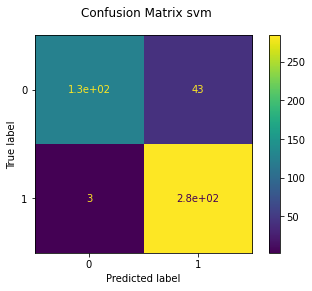

In [4]:
y_pred = class_cancer.predict(X_test)
print("F-measure SVM =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(class_cancer, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix svm")

### Perceptron:

In [5]:
from sklearn.linear_model import Perceptron
class_cancer2 = Perceptron(random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(cancer_tissues[att], [1 if x == 'B' else 0 for x in cancer_tissues['diagnosis']], test_size=0.8, random_state=0)
class_cancer2.fit(X2_train,y2_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

F-measure PERCEPTRONES = 0.7027027027027026


Text(0.5, 0.98, 'Confusion Matrix PERCEPTRONES')

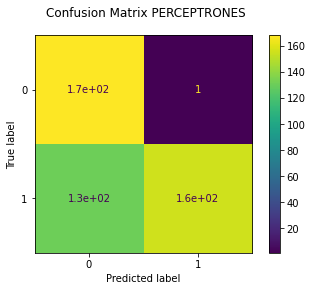

In [6]:
y2_pred = class_cancer2.predict(X2_test)
print("F-measure PERCEPTRONES =",metrics.f1_score(y2_test, y2_pred))
disp = metrics.plot_confusion_matrix(class_cancer2, X2_test, y2_test)
disp.figure_.suptitle("Confusion Matrix PERCEPTRONES")

### Random forest:
DecisionTree, RandomForest, ExtraTrees

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

class_cancer3 = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(class_cancer3, cancer_tissues[att], [1 if x == 'B' else 0 for x in cancer_tissues['diagnosis']])
print(scores.mean())
class_cancer3 = RandomForestClassifier()
scores = cross_val_score(class_cancer3, cancer_tissues[att], [1 if x == 'B' else 0 for x in cancer_tissues['diagnosis']])
print(scores.mean())
class_cancer3 = ExtraTreesClassifier()
scores = cross_val_score(class_cancer3,cancer_tissues[att], [1 if x == 'B' else 0 for x in cancer_tissues['diagnosis']])
print(scores.mean())

0.9173730787144851
0.9648657040832169
0.9648657040832168


# EJERCICIO 4: AUDIO

## Descarga y procesamiento (NO EJECUTAR)
Esta parte conviene no ejecutarla porque tarda mucho!
El .csv procesado de esta parte esta en: https://raw.githubusercontent.com/Copita12/MLCopita/master/mel.csv

In [ ]:
# Descargar 
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot http://opihi.cs.uvic.ca/sound/genres.tar.gz

--2020-11-09 20:22:43--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘dataroot/genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  1.64MB/s    in 12m 23s 

2020-11-09 20:35:07 (1.57 MB/s) - ‘dataroot/genres.tar.gz’ saved [1225571541/1225571541]



In [ ]:
# descomprimir
import tarfile
dataroot = "dataroot/"
with tarfile.open(dataroot+"genres.tar.gz","r:gz") as tar_ref:
    tar_ref.extractall(dataroot)
    tar_ref.close()

In [ ]:
import os
import pandas as pd
import scipy.io.wavfile
import numpy as np
data = []
rate = []
genre = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
r_dir = 'dataroot/genres/'
audio_df = pd.DataFrame(index=range(0,1000),columns=['data','rate','genre'])
i=0
for y in genre:
  dir = r_dir + y
  for root,sub,files in os.walk(dir):
      files = sorted(files)
      for f in files:
          s_rate, x = scipy.io.wavfile.read(os.path.join(root, f))
          rate.append(s_rate)
          data.append(x)
          audio_df['data'][i] = x
          audio_df['rate'][i] = 22050
          audio_df['genre'][i] = y
          i+=1
audio_df

,data,rate,genre
0,"[240, 544, 250, -115, -74, -307, -743, -733, -...",22050,blues
1,"[112, 141, 45, 42, 58, 83, 127, 139, 191, 237,...",22050,blues
2,"[623, 1563, 964, -590, -1144, -2045, -2826, -2...",22050,blues
3,"[-426, -1003, -1182, -1346, -1521, -1497, -138...",22050,blues
4,"[-207, -304, -273, -276, -274, -243, -124, 51,...",22050,blues
...,...,...,...
995,"[-2708, -4072, -3040, -2451, -1971, -1835, -23...",22050,rock
996,"[2383, 3398, 3346, 3510, 3422, 4014, 4305, 336...",22050,rock
997,"[-1119, -1257, 101, 713, 158, -927, -1468, -10...",22050,rock
998,"[2816, 4746, 4684, 5097, 5291, 5295, 5237, 508...",22050,rock


El siguiente bloque realiza para todas las canciones una division cada 500 datos y guarda su dct discreta de 10 valores, los cuales posteriormente son promediados con las transformadas de los demas segundos de esa cancion dejando un promedio por frecuencias. Este metodo es un ejemplo de lo que NO hay que hacer!

In [ ]:
import scipy.fftpack as sp

prev = []
proc = []
freq_df = pd.DataFrame(0,index=range(0,1000),columns=['freq{}'.format(i) for i in range(10)])
data_length = 500
j=0
k=0
for c in range(1000):
  for i in range(len(audio_df['data'][c])):
    prev.append(audio_df['data'][c][i])
    j+=1
    if j==data_length:
      j=0
      proc.append(sp.dct(prev,n=10))
      prev.clear()
  for x in range(len(proc)):
    for y in range(10):
        freq_df['freq{}'.format(y)][c] += proc[x][y]
  proc.clear()

# Falta la linea freq_df['genre'] = audio_df['genre'] para asignar los generos de las canciones
# En el csv ya aparece con esta linea ejecutada aparte

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
freq_df.to_csv('freq.csv')
!cp freq.csv "/content/drive/My Drive/"

freq_df

In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=e49ca12842c272d594ebd9097f2c2141baba8b187f1ec886f47b998c04b483ac
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


El siguiente bloque realiza la transformada **MFCC** (Coeﬁcientes Cepstrales en las Frecuencias de Mel) son coeﬁcientes para la representación del habla basados en la percepción auditiva humana, utilizados de manera recurrente a la hora de implementar reconocimiento de audio automatico. Ver mas en: https://python-speech-features.readthedocs.io/en/latest/

In [ ]:
from python_speech_features import mfcc
from python_speech_features import logfbank

proc = []
mel_df = pd.DataFrame(0,index=range(0,1000),columns=['feat{}'.format(i) for i in range(13)])

# for c in range(1000):
#   prev = mfcc(audio_df['data'][c],audio_df['rate'][c],nfft=1024)
#   for i in range(26):
#     mel_df['feat{}'.format(i)][c] = prev[i]

for c in range(0,1000):
  proc = mfcc(audio_df['data'][c],audio_df['rate'][c],nfft=1024)
  for x in range(len(proc)):
    for y in range(13):
        mel_df['feat{}'.format(y)][c] += proc[x][y]

from google.colab import drive
drive.mount('/drive', force_remount=True)
mel_df.to_csv('mel.csv')
!cp mel.csv "/drive/My Drive/"

mel_df

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12
0,56253,-3651,-44043,11172,-27208,6232,-53679,17539,-42689,19797,-21308,21643,-12932
1,50979,1431,-7582,11487,-20925,20309,-49851,43785,-48720,14490,-23705,10880,-20909
2,57936,8947,-53746,-2001,-40324,26400,-32916,9838,-37865,15796,-33650,6668,-14499
3,50620,26186,-11634,13342,-22849,25120,-25458,30759,-14078,35858,-21046,21634,-11384
4,54914,2841,-68148,-3092,-86403,5322,-52686,-772,-36105,17194,-29819,-1856,-15076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54430,-10754,-40411,34634,-19094,-3989,-48034,24227,-43243,28879,-14393,25878,-28064
996,54529,-10042,-50762,18668,-19858,10263,-48365,27986,-42206,13753,-27863,36970,-19172
997,56245,-14246,-68377,29210,-22716,5684,-29451,16653,-38451,1965,-39329,17896,-23751
998,50095,6348,-26653,48683,4078,14096,-50276,17663,-36099,30885,-32622,16614,-30841


## Ejecutar desde aca

Algunos modelos requieren coeficientes numericos para su entrenamiento, por ello implemento la siguiente funcion.

In [12]:
import pandas as pd
mel_df = pd.read_csv('https://raw.githubusercontent.com/Copita12/MLCopita/master/mel.csv')

def genre_to_num(x):
    return {
        'blues': 1,
        'classical': 2,
        'country': 3,
        'disco': 4,
        'hiphop': 5,
        'jazz': 6,
        'metal': 7,
        'pop': 8,
        'reggae': 9,
        'rock': 10
    }[x]

mel_df['genre_in_num'] = [genre_to_num(mel_df['genre'][i]) for i in range(0,1000)]

### Entrenar un modelo
Probamos algunos modelos y vemos sus estimadores 

F-measure perceptron = 0.2972237444319145


Text(0.5, 0.98, 'Confusion Matrix perceptron')

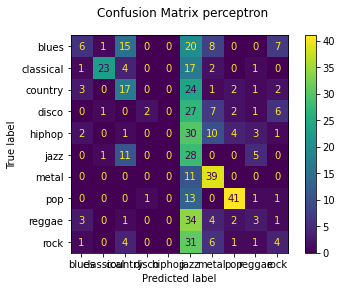

In [10]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import Perceptron

cols=['feat{}'.format(i) for i in range(13)]
music = Perceptron()
X_train, X_test, y_train, y_test = train_test_split(mel_df[cols], mel_df['genre'], test_size=0.5,random_state=1)
music.fit(X_train,y_train)
y_pred = music.predict(X_test)

print("F-measure perceptron =",metrics.f1_score(y_test, y_pred,average='macro'))
disp = metrics.plot_confusion_matrix(music, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix perceptron")

Este es el modelo con mayor presicion obtenido para este ejecicio :D

F-measure SVM = 0.5917750963633316


Text(0.5, 0.98, 'Confusion Matrix svm')

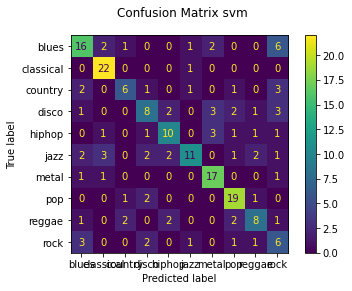

In [13]:
music = svm.SVC()
X_train, X_test, y_train, y_test = train_test_split(mel_df[cols], mel_df['genre'], test_size=0.2,random_state=110198)
music.fit(X_train,y_train)
y_pred = music.predict(X_test)

print("F-measure SVM =",metrics.f1_score(y_test, y_pred,average='macro'))
disp = metrics.plot_confusion_matrix(music, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix svm")

**WIP** (Work in progress): 
Como conclusion espero mejorar este modelo mediante una vectorizacion de distintos atributos, dejando de lado la informacion que nos provee la MFCC la cual es util a la hora de la representación del habla basados en la percepción auditiva humana y utilizando un poco mas un espectrograma el cual es bidimensional y requiere un procesamiento distinto de datos.